# **Scenario**

As a data analyst working in public health, understanding the impact of COVID-19 across different regions and over time is crucial for decision-making and resource allocation. By analyzing patterns in confirmed cases, deaths, and recoveries, we can identify hotspots, evaluate the effectiveness of containment efforts, and highlight areas requiring further attention. This analysis uses the cleaned COVID-19 dataset to generate various visualizations that each address a unique aspect of the pandemic’s trajectory.



In [1]:
# NHS Colour Palette
nhs_blue = '#005EB8'
nhs_light_blue = '#41B6E6'
nhs_aqua = '#00A9CE'
nhs_green = '#78BE20'
nhs_yellow = '#FFB81C'
nhs_red = '#DA291C'
nhs_purple = '#330072'

nhs_colors = [nhs_blue, nhs_green, nhs_light_blue, nhs_red, nhs_yellow,
              nhs_purple, nhs_aqua, nhs_blue, nhs_green, nhs_red]


# **1. Trend of Global Confirmed Cases Over Time**

Purpose: To observe how COVID-19 spread globally over time and identify key growth phases (e.g., early stages, peaks).

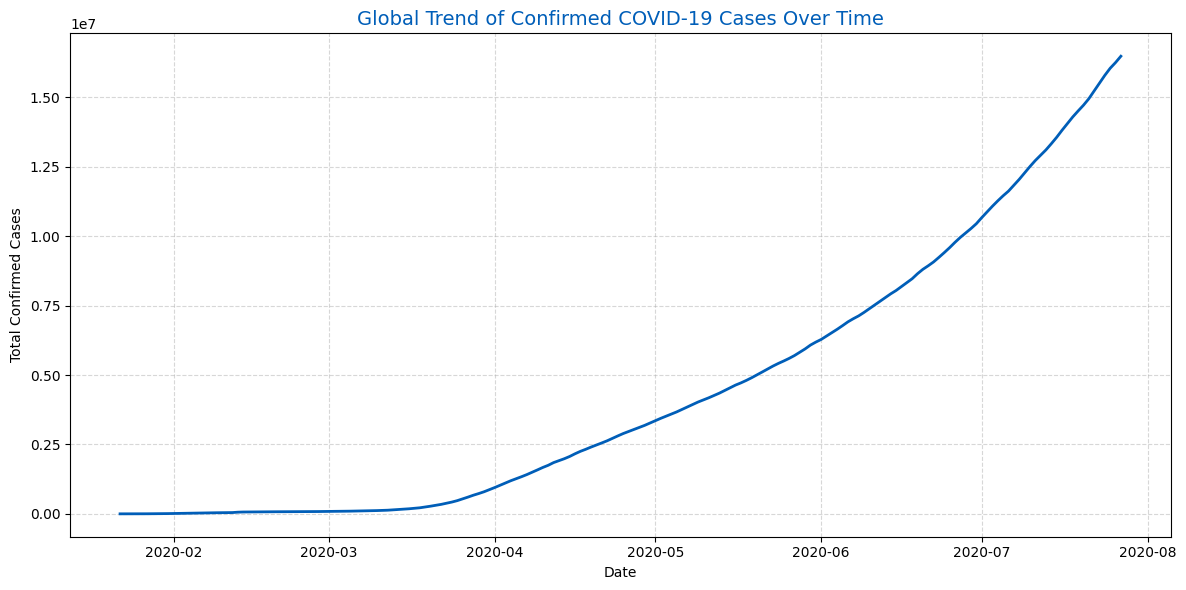

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('covid_19_clean_complete.csv')

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date to get global total per day
global_trend = df.groupby('Date')[['Confirmed']].sum()

plt.figure(figsize=(12,6))
plt.plot(global_trend.index, global_trend['Confirmed'], color=nhs_blue, linewidth=2)
plt.title('Global Trend of Confirmed COVID-19 Cases Over Time', fontsize=14, color=nhs_blue)
plt.xlabel('Date')
plt.ylabel('Total Confirmed Cases')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **2. Top 10 Countries with Highest Confirmed Cases**

Purpose: To identify which countries were most affected in terms of total confirmed cases, aiding in comparative analysis.

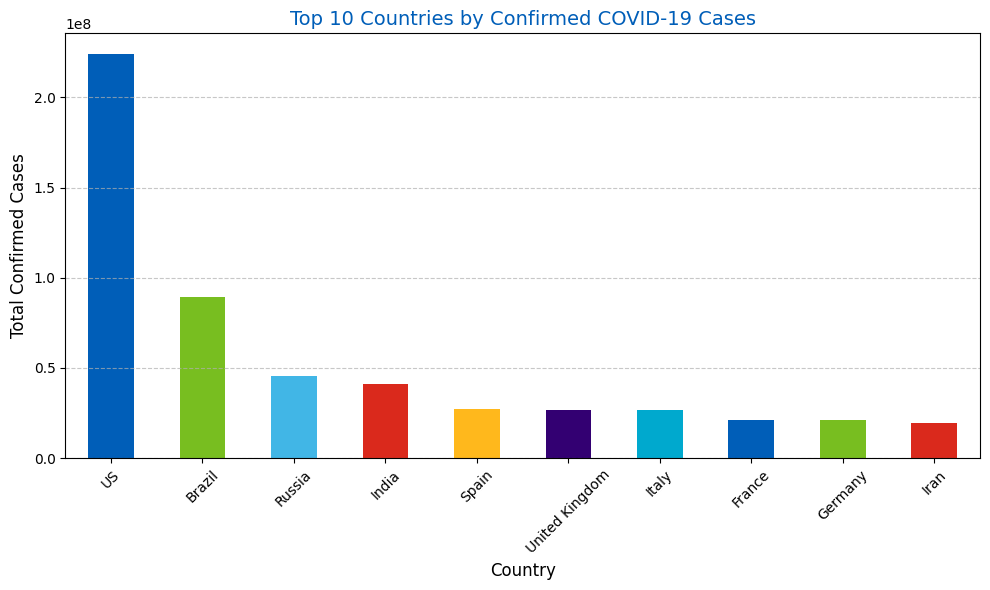

In [5]:

# Calculate total confirmed cases per country
country_summary = df.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(10)

# Now you can create the plot
plt.figure(figsize=(10,6))
country_summary.plot(kind='bar', legend=False, color=nhs_colors[:len(country_summary)])
plt.title('Top 10 Countries by Confirmed COVID-19 Cases', fontsize=14, color=nhs_blue)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Total Confirmed Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **3. Death Rate Over Time (Global)**

Purpose: To assess the progression of deaths relative to confirmed cases. This helps estimate how deadly the virus was at different stages.

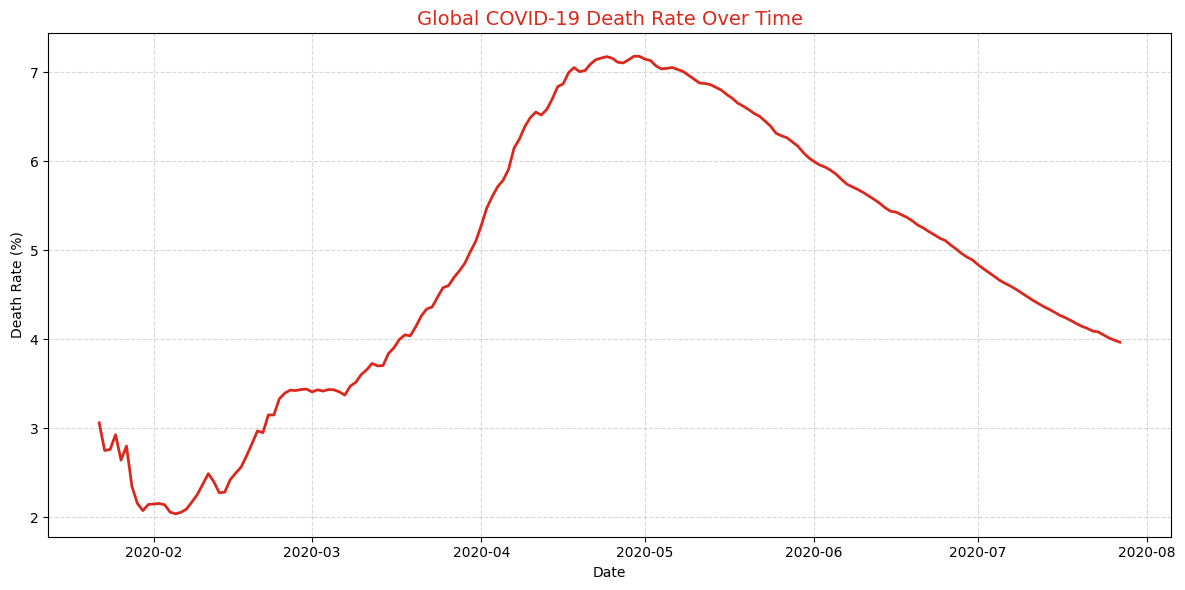

In [6]:

# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group by date to get global total per day for Confirmed cases and Deaths
global_confirmed = df.groupby('Date')[['Confirmed']].sum()
global_deaths = df.groupby('Date')[['Deaths']].sum()

# Calculate death rate
death_rate = (global_deaths['Deaths'] / global_confirmed['Confirmed']) * 100

plt.figure(figsize=(12,6))
plt.plot(global_confirmed.index, death_rate, color=nhs_red, linewidth=2)
plt.title('Global COVID-19 Death Rate Over Time', fontsize=14, color=nhs_red)
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **4. Daily New Cases (Worldwide)**
Purpose: To examine the rate of new infections per day, which can help identify waves or spikes.

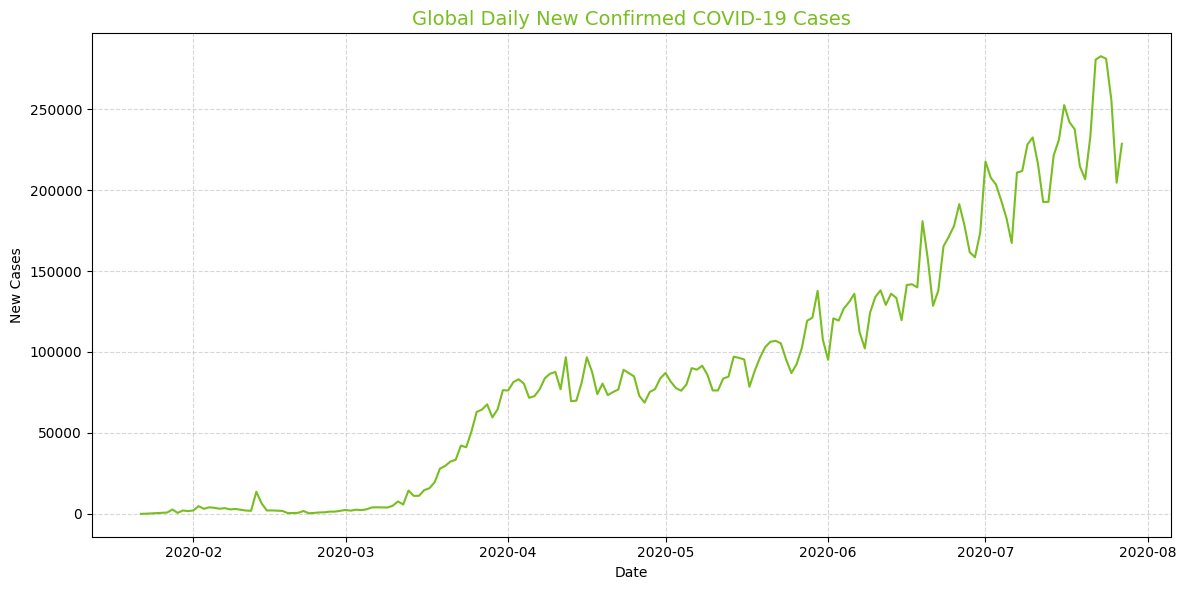

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(daily_cases.index, daily_cases['Confirmed'], color=nhs_green)
plt.title('Global Daily New Confirmed COVID-19 Cases', fontsize=14, color=nhs_green)
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



# **5. Recovered vs Deaths – Proportional View**
Purpose: To compare recovery and death outcomes to understand overall patient outcomes and health response.




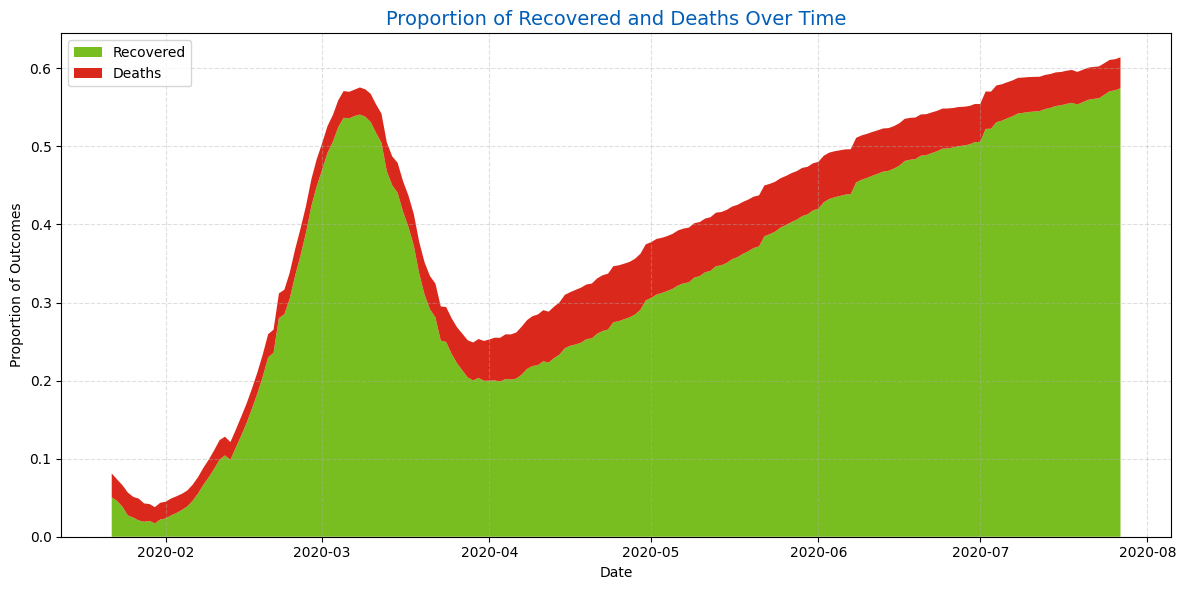

In [ ]:
# Calculate daily new cases worldwide
daily_cases = df.groupby('Date')['Confirmed'].sum().diff().fillna(0)

# Calculate global summary (Confirmed, Deaths, Recovered)
global_summary = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()

# Calculate proportions
proportions = global_summary.div(global_summary['Confirmed'], axis=0) # Calculate proportions

# ... (Rest of your plotting code remains the same)

plt.figure(figsize=(12,6))
plt.stackplot(global_summary.index,
              proportions['Recovered'], proportions['Deaths'],
              labels=['Recovered', 'Deaths'],
              colors=[nhs_green, nhs_red])
plt.title('Proportion of Recovered and Deaths Over Time', fontsize=14, color=nhs_blue)
plt.xlabel('Date')
plt.ylabel('Proportion of Outcomes')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# **6. Monthly Growth of Confirmed Cases (Worldwide)**

Purpose: This chart breaks down the global confirmed cases by month, helping us spot monthly trends and compare how quickly the virus was spreading over time.




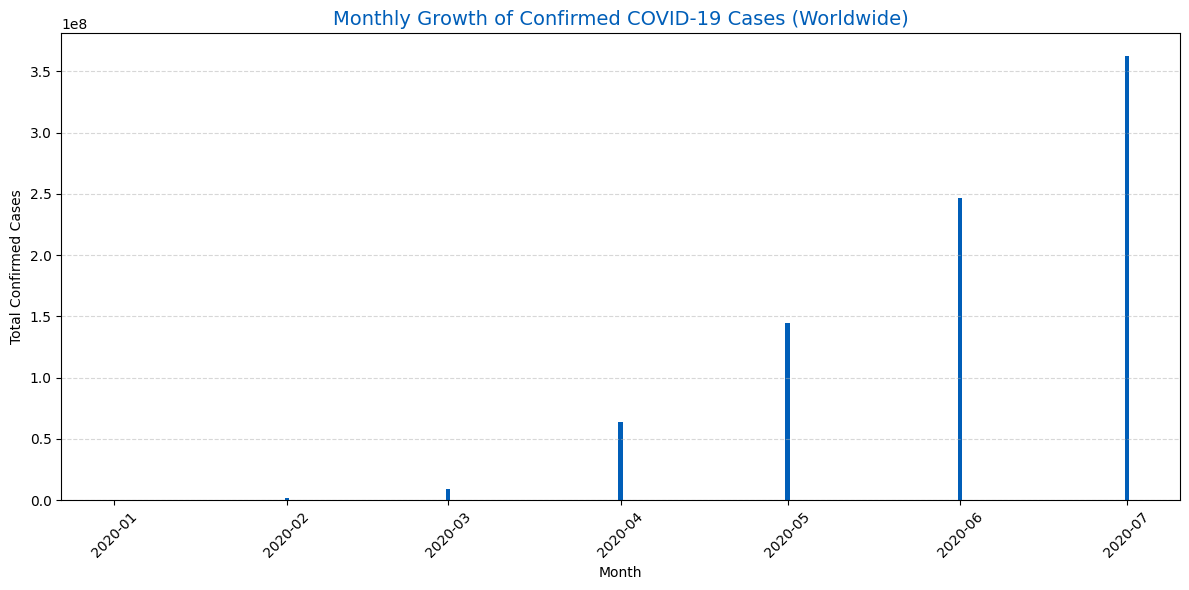

In [ ]:
# Add month-year column
df['Month'] = df['Date'].dt.to_period('M')

# Monthly confirmed cases total
monthly_cases = df.groupby('Month')['Confirmed'].sum()

# Convert Period to datetime for plotting
monthly_cases.index = monthly_cases.index.to_timestamp()

# Plot
plt.figure(figsize=(12,6))
plt.bar(monthly_cases.index, monthly_cases.values, color=nhs_blue)
plt.title('Monthly Growth of Confirmed COVID-19 Cases (Worldwide)', fontsize=14, color=nhs_blue)
plt.xlabel('Month')
plt.ylabel('Total Confirmed Cases')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# **7. Deaths vs Recoveries by Top 5 Countries**

Purpose: This chart compares the number of deaths and recoveries side-by-side for the five countries most affected. This helps evaluate the balance between negative and positive outcomes per country.

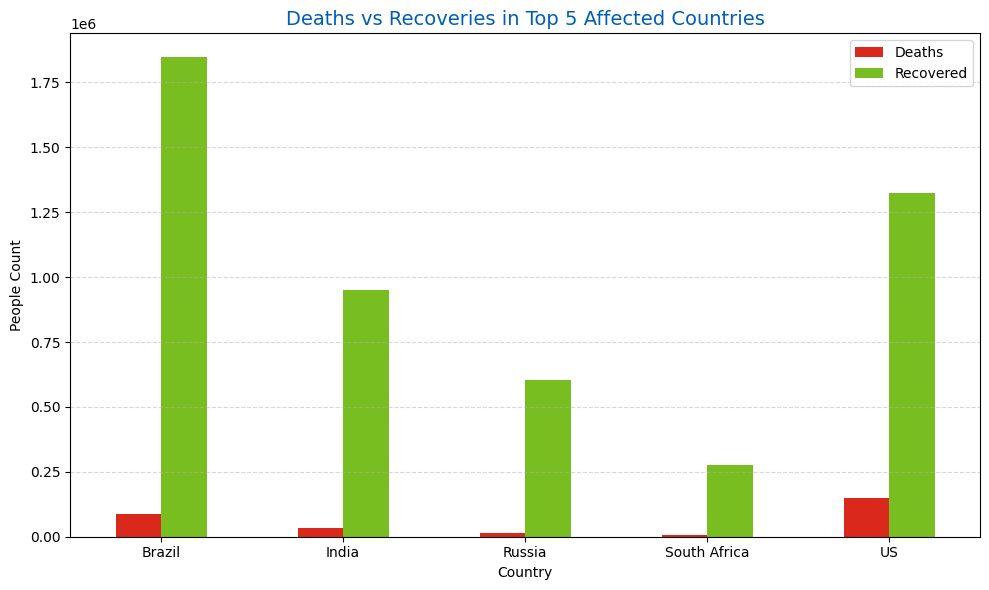

In [ ]:
# Get the latest date in the dataset
latest_date = df['Date'].max()

# Filter the dataframe to include only data from the latest date
latest_data = df[df['Date'] == latest_date]

# Get top 5 countries by confirmed cases
top_5_countries = latest_data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False).head(5).index

# Filter for those countries
top5_data = latest_data[latest_data['Country/Region'].isin(top_5_countries)]

# Group and sum
top5_summary = top5_data.groupby('Country/Region')[['Deaths', 'Recovered']].sum()

# Plot
top5_summary.plot(kind='bar', color=[nhs_red, nhs_green], figsize=(10,6))
plt.title('Deaths vs Recoveries in Top 5 Affected Countries', fontsize=14, color=nhs_blue)
plt.xlabel('Country')
plt.ylabel('People Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# **8. Heatmap of Confirmed Cases by Country Over Time**

Purpose: A heatmap gives a quick glance at how case counts changed over time for each country. It helps highlight peaks and spreads more visually across countries.


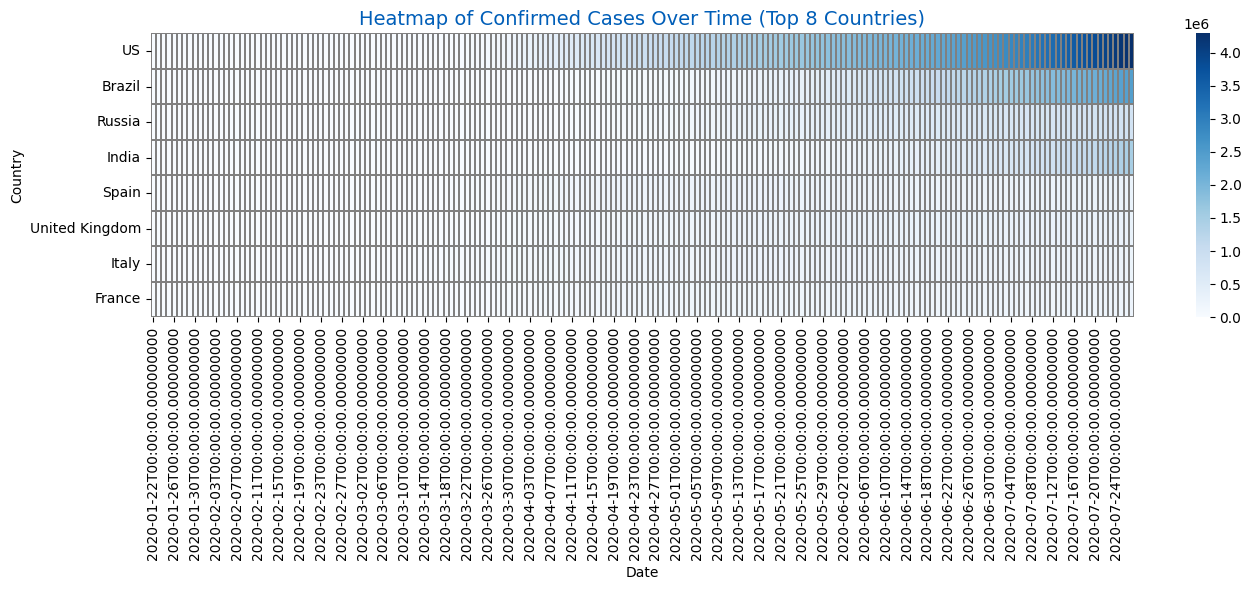

In [ ]:
import seaborn as sns

# Pivot: Countries as rows, Dates as columns
heatmap_data = df.groupby(['Country/Region', 'Date'])['Confirmed'].sum().unstack(fill_value=0)

# Pick top 8 countries by total cases
top_8_heatmap = heatmap_data.sum(axis=1).sort_values(ascending=False).head(8).index
heatmap_subset = heatmap_data.loc[top_8_heatmap]

# Plot heatmap
plt.figure(figsize=(14,6))
sns.heatmap(heatmap_subset, cmap='Blues', linewidths=0.1, linecolor='gray')
plt.title('Heatmap of Confirmed Cases Over Time (Top 8 Countries)', fontsize=14, color=nhs_blue)
plt.xlabel('Date')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
